# Heart Disease Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing dataset

In [2]:
data=pd.read_csv("heart_disease_uci.csv")
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## Data Exploration

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
data.shape

(920, 16)

In [8]:
data.duplicated().sum()

0

## Handling Missing Values

In [9]:
null=data.isnull().sum()

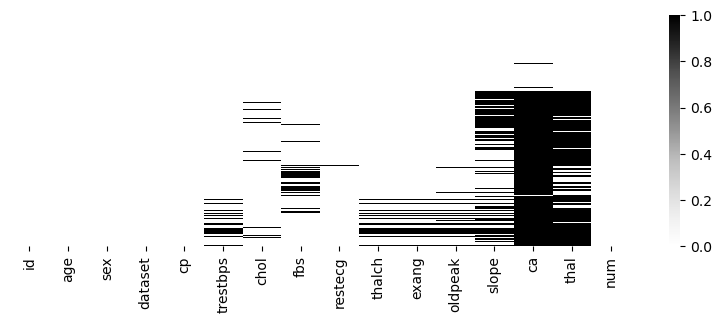

In [10]:
plt.figure(figsize=(10, 3))
sns.heatmap(data.isnull(), cbar=True, cmap='Greys', yticklabels=False)
plt.show()

## Handling Missing Values in Specific Columns 

In [11]:
data['trestbps'].fillna(value=data['trestbps'].mean(),inplace=True)
data['chol'].fillna(value=data['chol'].mean(),inplace=True)
data['thalch'].fillna(value=data['thalch'].mean(),inplace=True)
data['oldpeak'].fillna(value=data['oldpeak'].mean(),inplace=True)
data['ca'].fillna(value=data['ca'].mean(),inplace=True)

In [12]:
data[['trestbps', 'chol', 'thalch', 'ca', 'oldpeak']] = data[['trestbps', 'chol', 'thalch', 'ca', 'oldpeak']].astype(int)

In [13]:
data['fbs'].fillna(method='pad', inplace=True)
data['restecg'].fillna(method='pad', inplace=True)
data['exang'].fillna(method='pad', inplace=True)
data['slope'].fillna(method='pad', inplace=True)
data['thal'].fillna(method='pad', inplace=True)

## Data Visualization

In [14]:
data['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

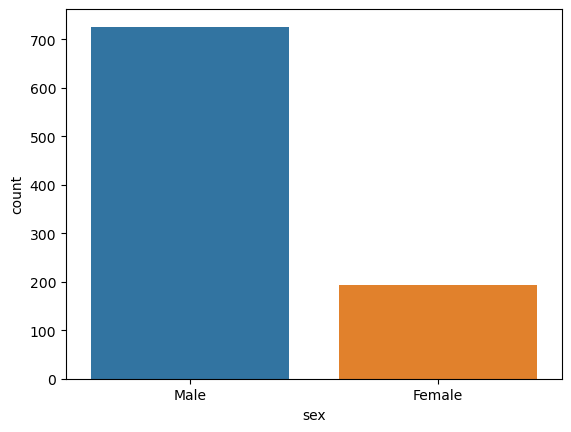

In [15]:
sns.countplot(x='sex', data=data)

In [16]:
data['restecg'].value_counts()

normal              553
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

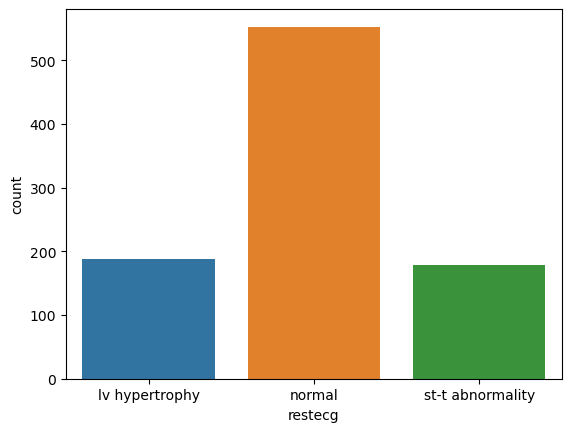

In [17]:
sns.countplot(x='restecg', data=data)

In [18]:
data['thal'].value_counts()

reversable defect    438
normal               348
fixed defect         134
Name: thal, dtype: int64

<Axes: xlabel='slope', ylabel='count'>

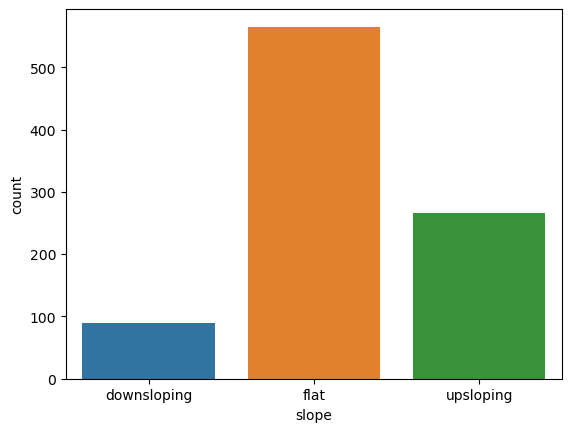

In [19]:
sns.countplot(x='slope', data=data)

In [20]:
data['slope'].value_counts()

flat           565
upsloping      266
downsloping     89
Name: slope, dtype: int64

<Axes: xlabel='slope', ylabel='count'>

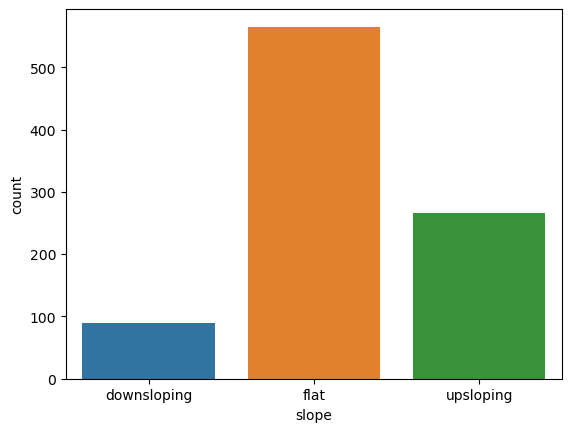

In [21]:
sns.countplot(x='slope', data=data)

In [22]:
data['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

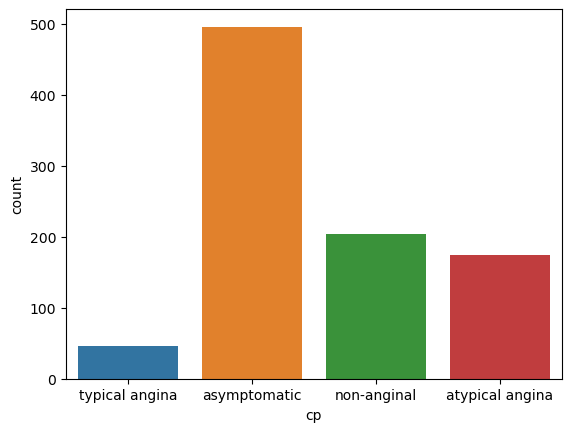

In [23]:
sns.countplot(x='cp', data=data)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_8728\2516244529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


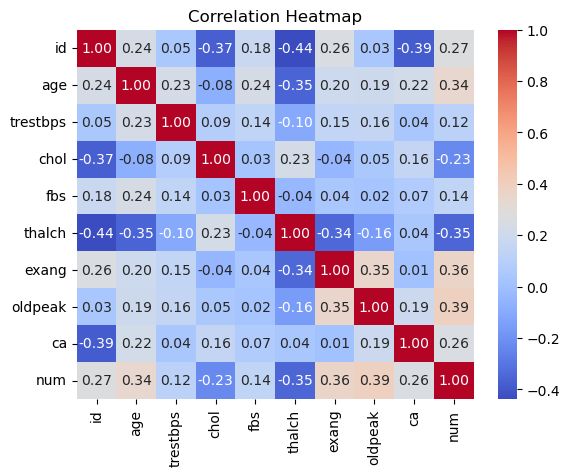

In [24]:
correlation=data.corr()
sns.heatmap(correlation,cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [26]:
categorical_columns = ['slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num','thal']
bool_columns = ['fbs', 'exang']
numeric_columns = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age','ca']

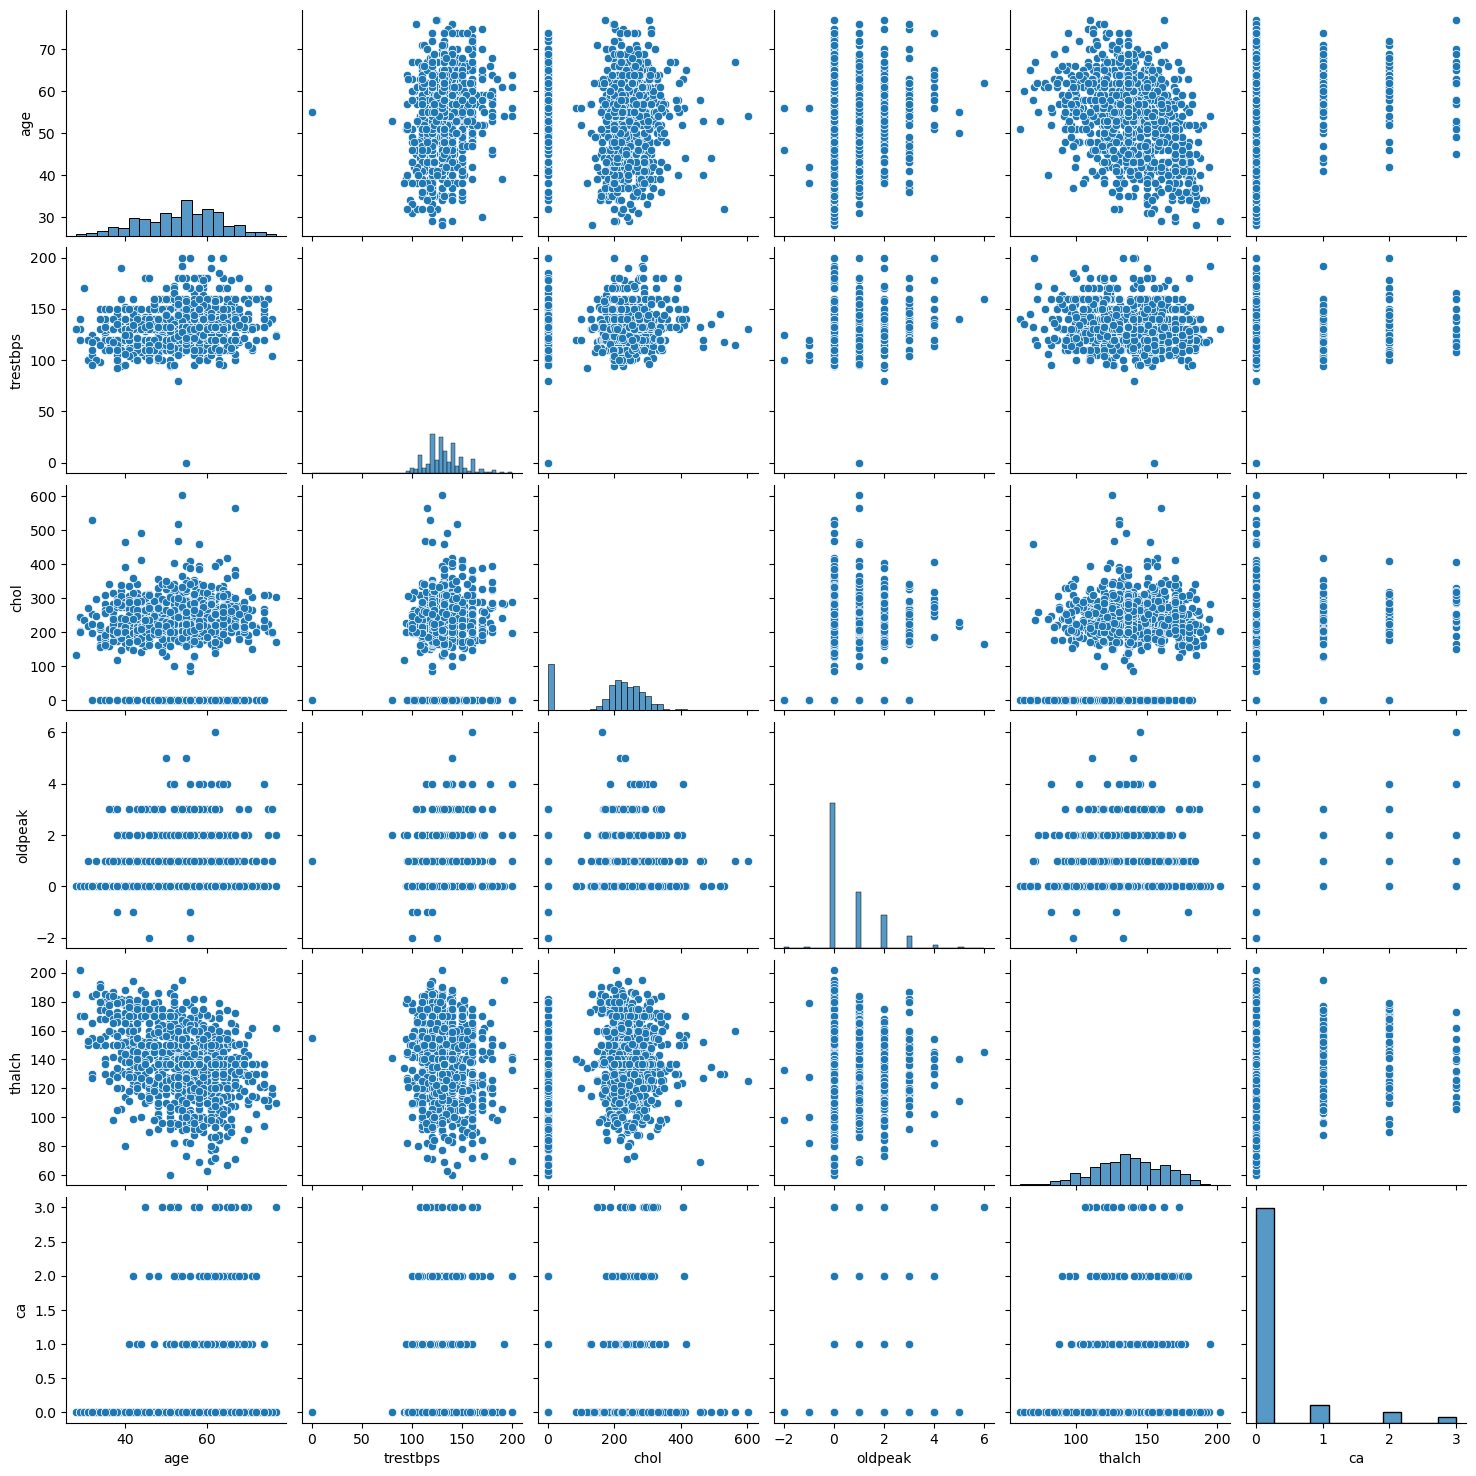

In [27]:
numeric_columns = ['age', 'trestbps', 'chol', 'oldpeak','thalch','ca']
sns.pairplot(data[numeric_columns], height=2.5)
plt.show()

## Outlier Detection and Removal

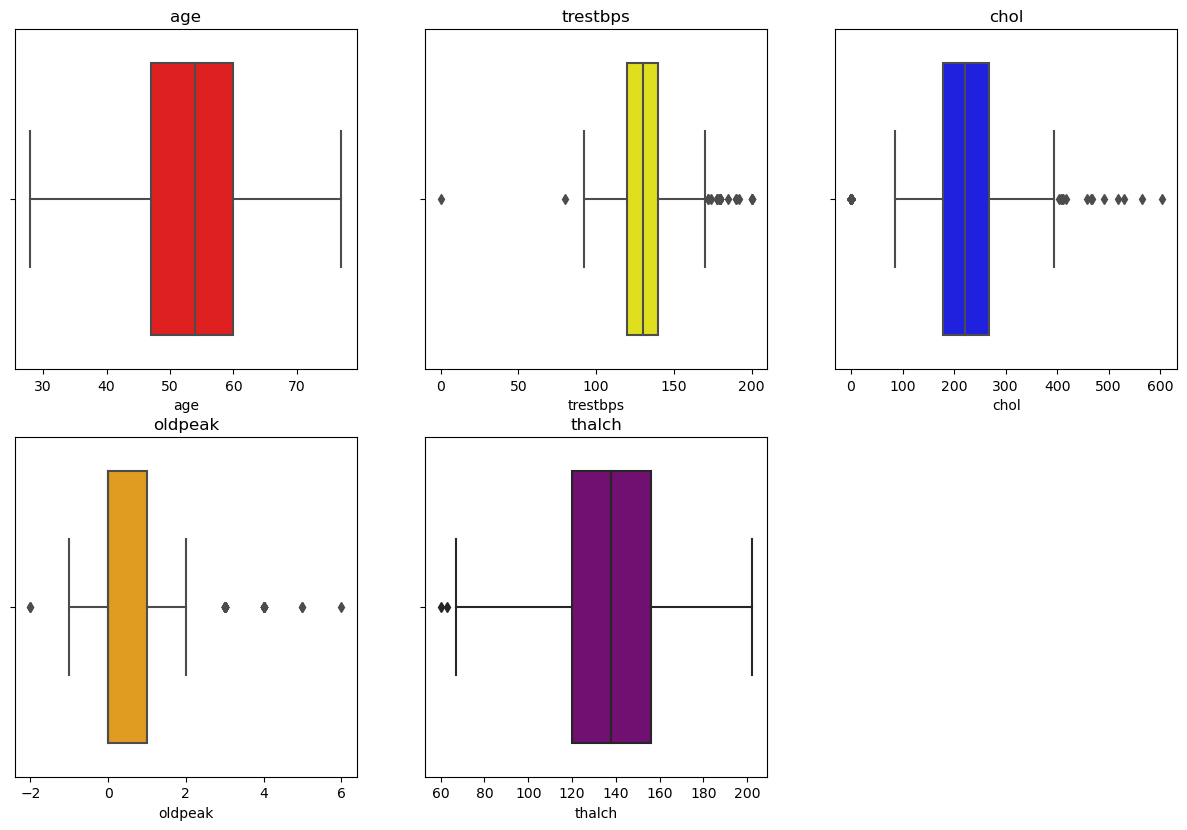

In [28]:
plt.figure(figsize=(15, 15))
colors = ['red', 'yellow', 'blue', 'orange', 'purple']
for i, col in enumerate(numeric_columns):
    if i < len(colors): 
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=data[col], color=colors[i])
        plt.title(col)
    else:
        break  

plt.show()

In [29]:
Q_1 = data[numeric_columns].quantile(0.25)
Q_3 = data[numeric_columns].quantile(0.75)
IQR = Q_3 - Q_1
Total_outliers = ((data[numeric_columns] < (Q_1 - 1.5 * IQR)) | (data[numeric_columns] > (Q_3 + 1.5 * IQR))).sum()
Total_outliers

age           0
trestbps     28
chol        185
oldpeak      58
thalch        2
ca          128
dtype: int64

## Data Preprocessing and Model Training

In [30]:
data = data[data['trestbps'] >= 80]
data = data[data['thalch'] >= 85]
data=data[data['age']>=18]
print("zero_counts :",(data['chol'] == 0).sum())
data = data[data['chol'] != 0]
data = data[data['chol'] >= 126]
data = data[data['chol'] <= 400]

zero_counts : 158


In [31]:
Q_1 = data['oldpeak'].quantile(0.25)
Q_3 = data['oldpeak'].quantile(0.75)
IQR = Q_3 - Q_1
lower_boundary = Q_1 - 1.5 * IQR
upper_boundary = Q_3 + 1.5 * IQR
data=data[(data['oldpeak'] >= lower_boundary) & (data['oldpeak'] <= upper_boundary)]

In [32]:
for col in data.columns:
      if data[col].dtype == "category" or data[col].dtype == "object":
          data[col] =LabelEncoder().fit_transform(data[col])
      else:
          pass

## Model Training and Evaluation 

In [33]:
X = data.drop('num', axis=1)
y = data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions)*100)
print('Classification Report:')
print(classification_report(y_test,predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

Accuracy: 74.26470588235294
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        79
           1       0.56      0.75      0.64        32
           2       0.25      0.09      0.13        11
           3       0.33      0.09      0.14        11
           4       0.00      0.00      0.00         3

    accuracy                           0.74       136
   macro avg       0.40      0.38      0.37       136
weighted avg       0.69      0.74      0.70       136

Confusion Matrix:
[[75  3  1  0  0]
 [ 7 24  0  1  0]
 [ 2  7  1  1  0]
 [ 2  7  1  1  0]
 [ 0  2  1  0  0]]


C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PMLS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
